In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append("../../../../")
import utils
import os

### fet feature data

In [2]:
## in this case since it is smi gene count data
## we load pc as input

pc = pd.read_csv('../data/Xton_sub_pc.csv')
#pd.DataFrame(pc).to_csv('../data/469_pc.csv', index=False)
pc.shape
#pc

(158259, 50)

In [3]:
features = utils.center_scale(pc)
features.shape

(158259, 50)

### read nbhd information

In [4]:
nbhd_compo = np.load('../data/Xton_cell_nbhd_res0.5_k20.npy')
nbhd_compo  = utils.center_scale(nbhd_compo)
nbhd_compo.shape

(158259, 8)

In [5]:
# start cca
cca = CCA(scale=False, n_components=8)
cca.fit(features, nbhd_compo)

CCA(n_components=8, scale=False)

In [6]:
X1_c, X2_c = cca.transform(features, nbhd_compo)

In [7]:
X1_c.shape

(158259, 8)

In [11]:
import anndata as ad
import scanpy as sc
import scipy
import matplotlib.patches as mpatches

adata = ad.AnnData(X1_c)
df = pd.read_csv('../data/Xton_sub_meta_snap_feat_clusters.csv')
sc.pp.scale(adata)
adata.obs['annotation'] = list(df['leiden'])
sc.tl.pca(adata, svd_solver='arpack')

/tmp/ipykernel_686466/2041344843.py:6: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X1_c)


/home/bokai/miniconda3/envs/cellsnap/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot: title={'center': 'annotation'}, xlabel='UMAP1', ylabel='UMAP2'>

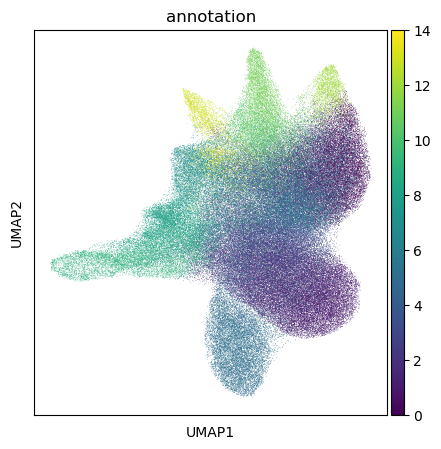

In [12]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
plt.rcParams["figure.figsize"] = (5,5)
sc.pl.umap(adata, color='annotation', legend_fontsize=12, show=False)

In [13]:
pd.DataFrame(X1_c).to_csv('../data/cca8_feat.csv', index=False)